## Лабораторная работа № 6
## Бабичева Анна М8О-404Б-17
## Вариант № 2

Импортирую необходимые библиотеки, включая собственную matrix и graphics_for_labs.

In [1]:
import numpy as np
import pandas as pd
import math
import pylab
import matplotlib.pyplot as plt
import random
import matrix

from graphics_for_labs import Graphic
from numpy import arange
from numpy import meshgrid
from matplotlib import mlab
from sys import stdin
from copy import deepcopy

### Используя явную схему крест и неявную схему, решить начально-краевую задачу для дифференциального уравнения гиперболического типа. Аппроксимацию второго начального условия произвести с первым и со вторым порядком. Осуществить реализацию трех вариантов аппроксимации граничных условий, содержащих производные: двухточечная аппроксимация с первым порядком, трехточечная аппроксимация со вторым порядком, двухточечная аппроксимация со вторым порядком. В различные моменты времени вычислить погрешность численного решения путем сравнения результатов с приведенным в задании аналитическим решением $U(x, t)$. Исследовать зависимость погрешности от сеточных параметров $\tau, h$.

Начально-каревая задача:

$$\frac{\partial^2 u}{\partial t^2}=a^2\frac{\partial^2 u}{\partial x^2}, a^2>0$$

$$u'_x(0,t)-u(0,t)=0$$

$$u'_x(\pi,t)-u(\pi,t)=0$$

$$u(x,0)=sinx+cosx$$

$$u'_t(x,0)=-a(sinx+cosx)$$

Данная задача является третьей начально-краевой задачей для волнового уравнения.

Аналитическое решение:

$$U(x,t)=sin(x-at)+cos(x+at)$$

Задам параметр a:

In [2]:
a = 1

Для удобства пропишу некоторые вспомогательные функции:

In [3]:
def sin_(x):
    return math.sin(x)

def cos_(x):
    return math.cos(x)

pi = math.pi

In [4]:
def U(x, t):
    return sin_(x - a * t) + cos_(x + a * t)

### Конечно-разностные аппроксимации

$\frac{\partial^2 u}{\partial t^2}\bigg|_i^k = \frac{u_{i}^{k+1} -2u_i^k + u_{i}^{k-1}}{\tau^2} + O(\tau^2)$

где $k = 0, 1, 2, ..., K; \tau = \frac{T}{K}$

$\frac{\partial^2 u}{\partial x^2}\bigg|_i^k = \frac{u_{i+1}^k -2u_i^k + u_{i-1}^k}{h^2} + O(h^2)$

где $i = 0, 1, 2, ..., N; h = \frac{l}{N}$

### Аппроксимация граничных условий

#### Двухточечная с первым порядком

$\frac{\partial u}{\partial x}\bigg|^{k+1}_0 = \frac{u^{k+1}_1 - u^{k+1}_0}{h} + O(h)$

$\frac{\partial u}{\partial x}\bigg|^{k+1}_N = \frac{u^{k+1}_N - u^{k+1}_{N-1}}{h} + O(h)$

Отсюда аппроксимации для явной схемы имеют вид:

$u_0^{k+1}=\frac{u_1^{k+1}}{1+h}$

$u_N^{k+1}=\frac{u_{N-1}^{k+1}}{1-h}$

In [5]:
def u_0_ex_1(u, k, h):
    u[k + 1][0] = u[k + 1][1] / (1 + h)
    return u

def u_N_ex_1(u, k, h, N):
    u[k + 1][N] = u[k + 1][N - 1] / (1 - h)
    return u

Для неявной схемы будет решаться система уравнений методом прогонки:

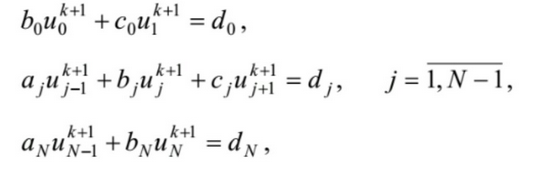

где:

$b_0=\frac{-h-1}{h},\quad c_0=\frac{1}{h},\quad d_0=0$

$a_N=-\frac{1}{h},\quad b_N=\frac{1-h}{h},\quad d_N=0$

In [6]:
def u_0_im_1(h):
    b = (- h - 1) / h
    c = 1 / h
    d = 0
    return b, c, d

def u_N_im_1(h):
    a = - 1 / h
    b = (1 - h) / h
    d = 0
    return a, b, d

#### Трехточечная со вторым порядком

$\frac{\partial u}{\partial x}\bigg|_0^{k+1}=\frac{-3u_0^{k+1}+4u_1^{k+1}-u_2^{k+1}}{2h} + O(h^2)$

$\frac{\partial u}{\partial x}\bigg|_N^{k+1}=\frac{u_{N-2}^{k+1}-4u_{N-1}^{k+1}+3u_N^{k+1}}{2h} + O(h^2)$

Аппроксимации для явной схемы:

$u_0^{k+1}=\frac{-4u_1^{k+1}+u_2^{k+1}}{-3-2h}$

$u_N^{k+1}=\frac{4u_{N-1}^{k+1}-u_{N-2}^{k+1}}{3-2h}$

In [7]:
def u_0_ex_2(u, k, h):
    u[k + 1][0] = (- 4 * u[k + 1][1] + u[k + 1][2]) / (- 3 - 2 * h)
    return u

def u_N_ex_2(u, k, h, N):
    u[k + 1][N] = (4 * u[k + 1][N - 1] - u[k + 1][N - 2]) / (3 - 2 * h)
    return u

В случае неявной схемы система теряет трехдиагональный вид: 

$b_0u_0^{k+1}+c_0u_1^{k+1}+gu_2^{k+1}=d_0$

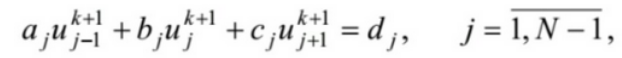

$fu_{N-2}^{k+1}+a_Nu_{N-1}^{k+1}+b_Nu_N^{k+1}=d_N$

Однако с помощью линейного преобразования можно избавиться от лишнего слагаемого и новые $b^*_0, c^*_0, g^*, d^*_0, b^*_N, a^*_N, f^*, d^*_N$ будут равны:

$b^*_0=b_0-a_1p,\quad c^*_0=c_0-b_1p,\quad g^*=0,\quad d^*_0=d_0-d_1p,\quadгде\quad p=\frac{g}{c_1}$

$b^*_N=b_N-c_{N-1}q,\quad a^*_N=a_N-b_{N-1}q,\quad f^*=0,\quad d^*_N=d_N-d_{N-1}q,\quadгде\quad q=\frac{f}{a_{N-1}}$

Для данной задачи:

$b_0=\frac{-3-2h}{2h},\quad c_0=\frac{2}{h},\quad g=-\frac{1}{2h},\quad d_0=0$

$b_N=\frac{3-2h}{2h},\quad a_N=-\frac{2}{h},\quad f=\frac{1}{2h},\quad d_N=0$

In [8]:
def u_0_im_2(u, k, h, s):  
    b = (- 1 - h) / h
    c = (2 * s - 1) / (2 * s * h)
    d = (u[k - 1][1] - 2 * u[k][1]) / (2 * h * s)
    
    return b, c, d

def u_N_im_2(u, k, N, h, s):  
    a = (1 - 2 * s) / (2 * h * s)
    b = (1 - h) / h
    d = - (u[k - 1][N - 1] - 2 * u[k][N - 1]) / (2 * h * s)
    return a, b, d

#### Двухточечная со вторым порядком

Разложим в ряд Тейлора в точке 0:

$u_1^{k+1}=u(0+h,t^{k+1})=u_0^{k+1}+h\frac{\partial u}{\partial x}\bigg|^{k+1}_0+\frac{h^2}{2}\frac{\partial^2 u}{\partial x^2}\bigg|^{k+1}_0 + O(h^2)$

$u_{N-1}^{k+1}=u(\pi-h,t^{k+1})=u_N^{k+1}+h\frac{\partial u}{\partial x}\bigg|^{k+1}_N+\frac{h^2}{2}\frac{\partial^2 u}{\partial x^2}\bigg|^{k+1}_N + O(h^2)$

Из дифференциального уравнения:

$\frac{\partial^2 u}{\partial x^2}\bigg|^{k+1}_{0,N}=\frac{1}{a^2}\frac{\partial^2 u}{\partial t^2}\bigg|^{k+1}_{0,N}=\frac{1}{a^2}\frac{u_{0,N}^{k+1}-2u_{0,N}^k+u_{0,N}^{k-1}}{\tau^2}$

Тогда аппроксимации для явной схемы:

$u_0^{k+1}=\frac{h^2(u_0^{k-1}-2u_0^k)-2a^2\tau^2u_1^{k+1}}{-2a^2\tau^2-h^2-2a^2\tau^2h}$

$u_N^{k+1}=\frac{-h^2(u_N^{k-1}-2u_N^k)+2a^2\tau^2u_{N-1}^{k+1}}{2a^2\tau^2+h^2-2a^2\tau^2h}$

In [9]:
def u_0_ex_3(u, k, h, tau):
    u[k + 1][0] = (h * h * (u[k - 1][0] - 2 * u[k][0]) - 2 * a * a * tau ** 2 * u[k + 1][1]) / (- 2 * a * a * tau ** 2 - h * h - 2 * a * a * tau ** 2 * h)
    return u

def u_N_ex_3(u, k, h, tau, N):
    u[k + 1][N] = (- h * h * (u[k - 1][N] - 2 * u[k][N]) + 2 * a * a * tau ** 2 * u[k + 1][N - 1]) / (2 * a * a * tau ** 2 + h * h - 2 * a * a * tau ** 2 * h)
    return u

Для неявной схемы соответсвующие коэффициенты будут:

$b_0=\frac{-2a^2\tau^2-h^2-2a^2\tau^2h}{2a^2\tau^2h},\quad c_0=\frac{1}{h},\quad d_0=\frac{h}{2a^2\tau^2}(u_0^{k+1}-2u_0^k)$

$a_N=-\frac{1}{h},\quad b_N=\frac{2a^2\tau^2+h^2-2a^2\tau^2h}{2a^2\tau^2h},\quad d_N=-\frac{h}{2a^2\tau^2}(u_N^{k+1}-2u_N^k)$

In [10]:
def u_0_im_3(u, k, h, tau, s):
    b = (- 2 * a * a * tau ** 2 - h * h - 2 * a * a * tau ** 2 * h) / (2 * a * a * tau ** 2 * h)
    c = 1 / h
    d = (h / (2 * a * a * tau ** 2)) * (u[k - 1][0] - 2 * u[k][0])
    return b, c, d

def u_N_im_3(u, k, N, h, tau, s):
    a = - 1 / h
    b = (2 * a * a * tau ** 2 + h * h - 2 * a * a * tau ** 2 * h) / (2 * a * a * tau ** 2 * h)
    d = - (h / (2 * a * a * tau ** 2)) * (u[k - 1][N] - 2 * u[k][N])
    return a, b, d

### Аппроксимация начальных условий

Первое начальное условие можно записать явно:

$u_i^0=sinx_i+cosx_i$

In [11]:
def ui0(x, i):
    return sin_(x[i]) + cos_(x[i])

#### Аппроксимация второго начального с первым порядком точности

$\frac{\partial u}{\partial t}\bigg|^0_i=\frac{u^1_i-u^0_i}{\tau} + O(\tau)$

Отсюда:

$u_i^1=-a\tau(sinx_i+cosx_i)+u_i^0$

In [12]:
def ui1_1(x, i, tau):
    return - a * tau * (sin_(x[i]) + cos_(x[i])) + ui0(x, i)

#### Аппроксимация второго начального со вторым порядком точности

Разложим в ряд Тейлора:

$u_i^1=u(x_i,0+\tau)=u_i^0+\tau\frac{\partial u}{\partial t}\bigg|^0_i+\frac{\tau^2}{2}\frac{\partial^2 u}{\partial t^2}\bigg|^0_i + O(\tau^2)$

Из второго начального и дифференциального уравнения имеем:

$u_i^1=u_i^0-(sinx_i+cosx_i)(\frac{a^2\tau^2}{2}+a\tau)$

In [13]:
def ui1_2(x, i, tau):
    return ui0(x, i) - (sin_(x[i]) + cos_(x[i])) * (a * a * tau ** 2 / 2 + a * tau)

## Явная схема

После подстановки аппроксимаций:

$\frac{u_{i}^{k+1} -2u_i^k + u_{i}^{k-1}}{\tau^2}=\frac{u_{i+1}^k -2u_i^k + u_{i-1}^k}{h^2} + O(h^2+\tau^2)$

Неизвестной сеточной функцией является $u_i^{k+1}$:

$$u_i^{k+1}=\sigma u_{i+1}^k+(2-2\sigma)u_i^k+\sigma u_{i-1}^k-u_i^{k-1}$$

где

$$\sigma=\frac{a^2\tau^2}{h^2}<1$$

Явная схема условно устойчива при выполнении условия.

In [14]:
def explicit(T, N, K, approx_beginnings, approx_limits, l=0, r=pi, ui0=ui0, left_lims=[u_0_ex_1, u_0_ex_2, u_0_ex_3], right_lims=[u_N_ex_1, u_N_ex_2, u_N_ex_3], beginnings=[ui1_1, ui1_2]):
    
    tau = T / K
    h = (r - l) / N
    sigma = a * a * tau ** 2 / h ** 2
    
    if (sigma > 1):
        raise Exception("Измените параметры сетки!")

    x = [l + i * h for i in range(N + 1)]
    t = [k * tau for k in range(K + 1)]
    u = []
    u.append([ui0(x, i) for i in range(N + 1)])
    
    if approx_beginnings == 1:
        u.append([beginnings[0](x, i, tau) for i in range(N + 1)])
    elif approx_beginnings == 2:
        u.append([beginnings[1](x, i, tau) for i in range(N + 1)])
    else:
        raise Exception("Некорректно задан approx_beginnings: 1 или 2")
    
    for k in range(1, K):
        row = [0] * (N + 1)
        u.append(row)        
        for i in range(1, N): 
        #for i in range(N - 1, 0, -1):
            u[k + 1][i] = sigma * u[k][i + 1] + (2 - 2 * sigma) * u[k][i] + sigma * u[k][i - 1] - u[k - 1][i]
        if approx_limits == 1:
            u = left_lims[0](u, k, h)
            u = right_lims[0](u, k, h, N)
        elif approx_limits == 2:
            u = left_lims[1](u, k, h)
            u = right_lims[1](u, k, h, N)
        elif approx_limits == 3:
            u = left_lims[2](u, k, h, tau)
            u = right_lims[2](u, k, h, tau, N)
        else:
            raise Exception("Некорректно задан approx_limits: 1, 2 или 3")        
    
    return x, t, u

#### Слои и ошибки

Аппроксимация граничных и начальных первого порядка:

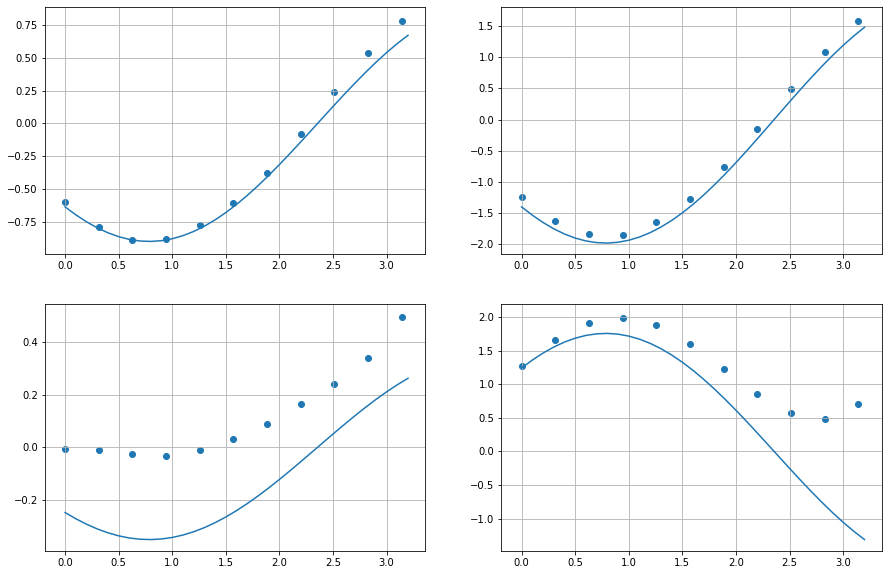

In [15]:
x, t, u = explicit(5, 10, 100, 1, 1)
Graphic.draw_levels(x, t, u, U, 0, pi)

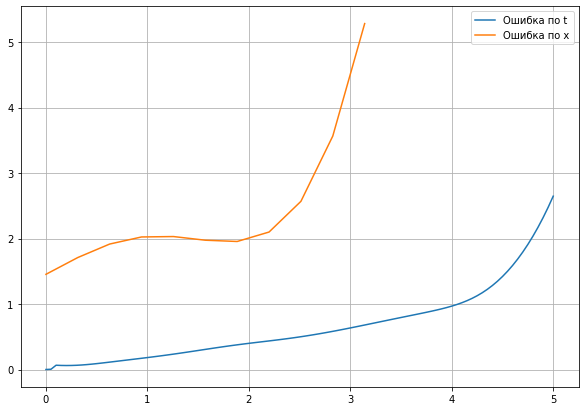

In [16]:
Graphic.draw_variance(x, t, u, U)

Аппроксимация граничных первого порядка и начальных второго:

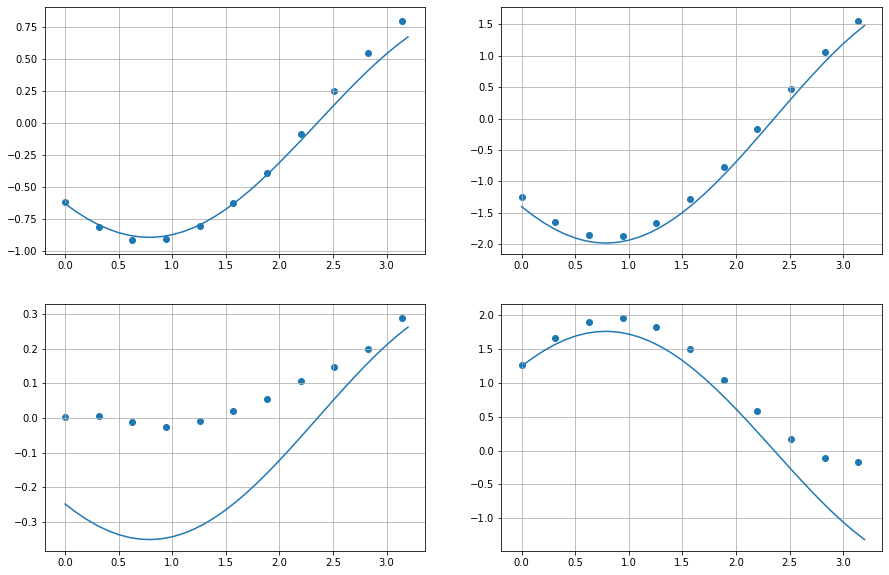

In [17]:
x, t, u = explicit(5, 10, 100, 2, 1)
Graphic.draw_levels(x, t, u, U, 0, pi)

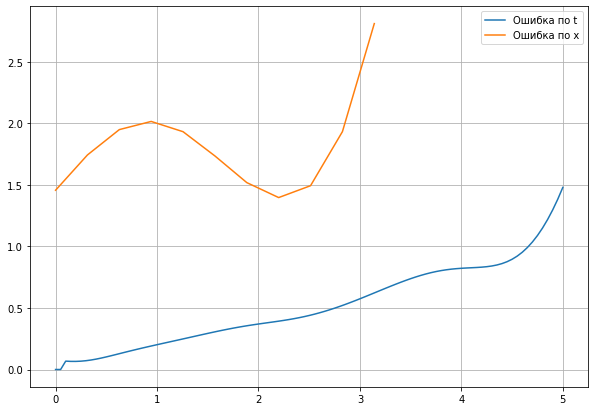

In [18]:
Graphic.draw_variance(x, t, u, U)

Трехточечная аппроксимация граничных и начальных первого порядка:

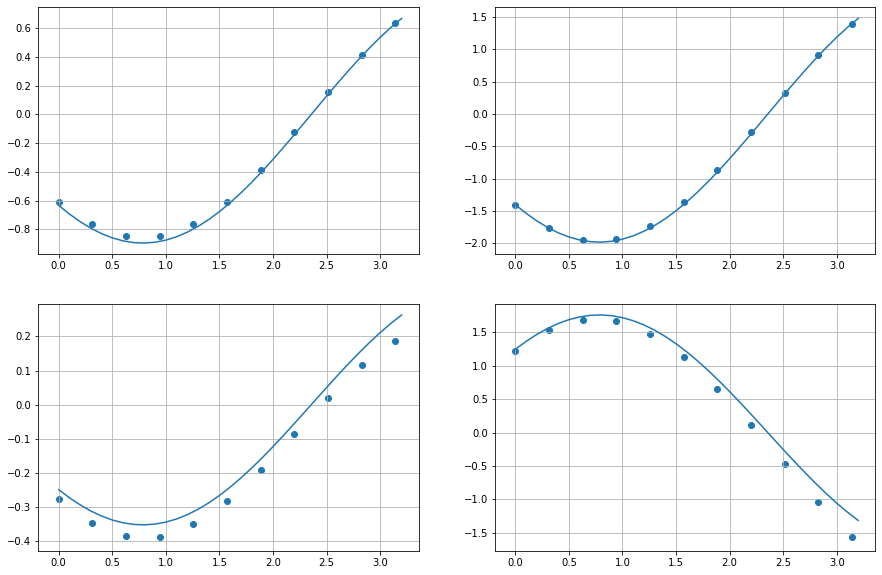

In [19]:
x, t, u = explicit(5, 10, 100, 1, 2)
Graphic.draw_levels(x, t, u, U, 0, pi)

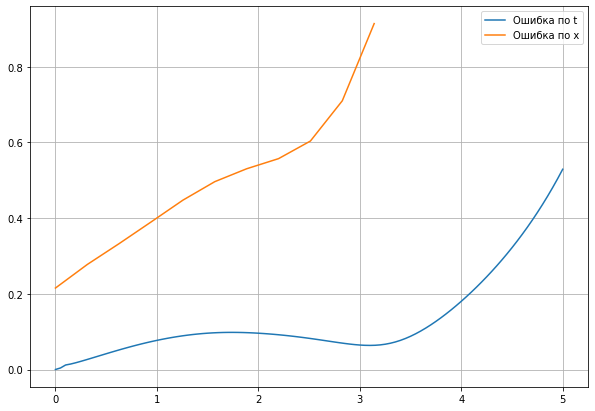

In [20]:
Graphic.draw_variance(x, t, u, U)

Трехточечная аппроксимация граничных и начальных второго порядка:

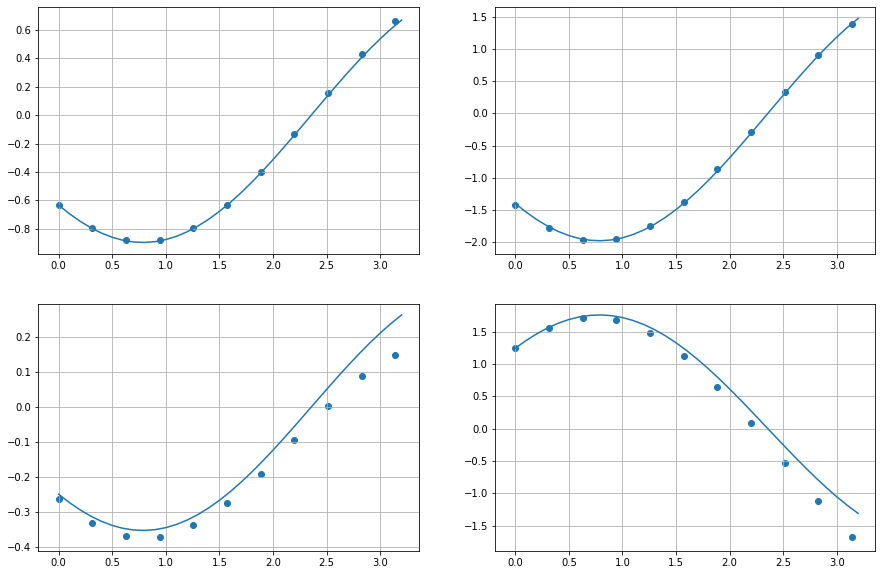

In [21]:
x, t, u = explicit(5, 10, 100, 2, 2)
Graphic.draw_levels(x, t, u, U, 0, pi)

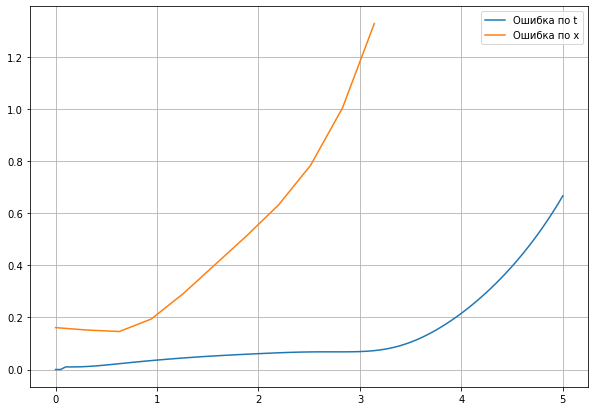

In [22]:
Graphic.draw_variance(x, t, u, U)

Двухточечная аппроксимация второго порядка граничных и начальных первого: 

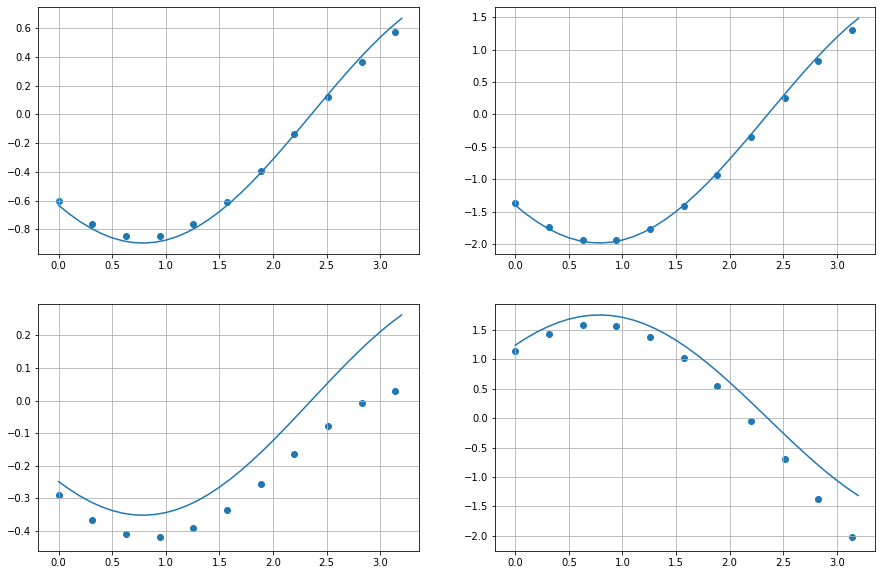

In [23]:
x, t, u = explicit(5, 10, 100, 1, 3)
Graphic.draw_levels(x, t, u, U, 0, pi)

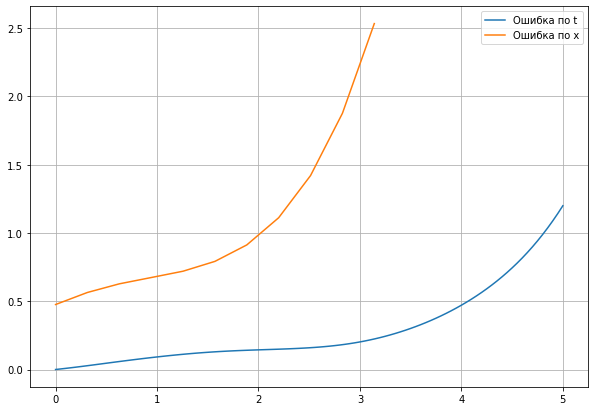

In [24]:
Graphic.draw_variance(x, t, u, U)

Двухточечная аппроксимация второго порядка граничных и начальных второго:

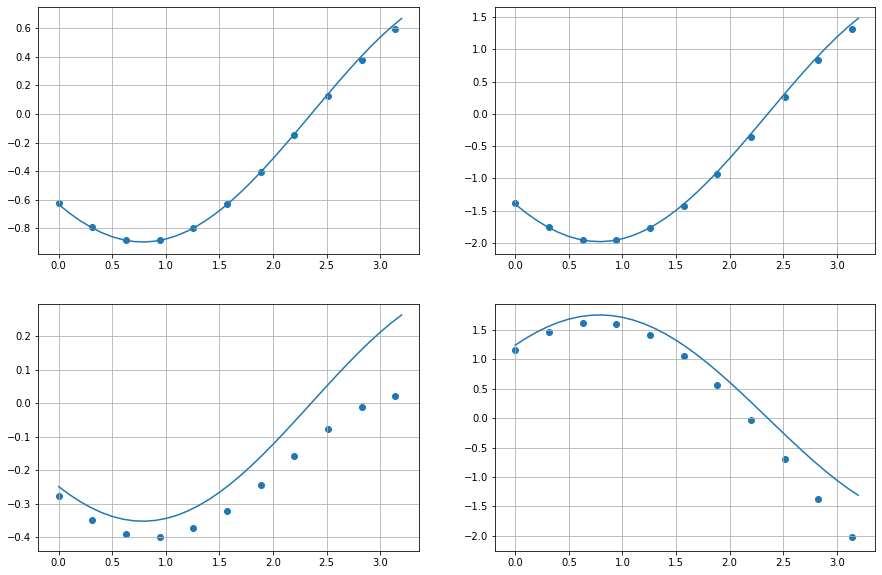

In [25]:
x, t, u = explicit(5, 10, 100, 2, 3)
Graphic.draw_levels(x, t, u, U, 0, pi)

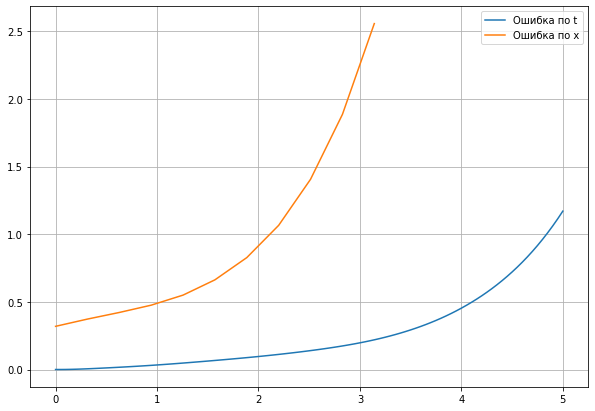

In [26]:
Graphic.draw_variance(x, t, u, U)

#### Сравнение двухточечной аппроксимации граничных первого порядка и начальных первого с двухточечной второго и начальными второго

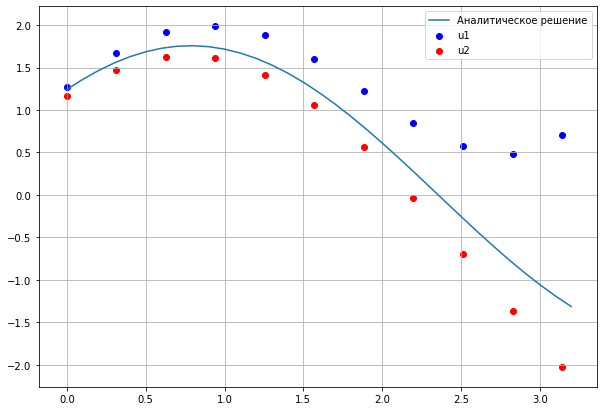

In [27]:
x, t, u_1 = explicit(5, 10, 100, 1, 1)
x, t, u_2 = explicit(5, 10, 100, 2, 3)

Graphic.draw_for_compare(x, t, u_1, u_2, U, 0, pi, 100)

## Неявная схема

При неявной схеме рассматриваются конечные разности на верхнем слое сетки. Получаем:

$\frac{u_i^{k+1} - 2u_i^k + u_i^{k-1}}{\tau^2} = a^2\frac{u_{i+1}^{k+1} -2u_i^{k+1} + u_{i-1}^{k+1}}{h^2} + O(\tau^2 + h^2)$

Сеточную функцию на верхнем слое можно получить из решения СЛАУ методом прогонки.

Неявная схема абсолютно устойчива.

In [28]:
def implicit(T, N, K, approx_beginnings, approx_limits, l=0, r=pi, ui0=ui0, left_lims=[u_0_im_1, u_0_im_2, u_0_im_3], right_lims=[u_N_im_1, u_N_im_2, u_N_im_3], beginnings=[ui1_1, ui1_2]):
    
    tau = T / K
    h = (r - l) / N
    sigma = a * a * tau ** 2 / h ** 2

    x = [l + i * h for i in range(N + 1)]
    t = [k * tau for k in range(K + 1)]
    u = []
    u.append([ui0(x, i) for i in range(N + 1)])
    
    if approx_beginnings == 1:
        u.append([beginnings[0](x, i, tau) for i in range(N + 1)])
    elif approx_beginnings == 2:
        u.append([beginnings[1](x, i, tau) for i in range(N + 1)])
    else:
        raise Exception("Некорректно задан approx_beginnings: 1 или 2")
    
    for k in range(1, K):
        A = []
        B = []
        
        a_ = sigma
        b_ = - (1 + 2 * sigma)
        c_ = sigma        
        
        for i in range(N + 1):
            rows = []
            
            d_ = u[k - 1][i] - 2 * u[k][i]
            if approx_limits == 1:
                b0, c0, d0 = left_lims[0](h)
                aN, bN, dN = right_lims[0](h)
            elif approx_limits == 2:
                b0, c0, d0 = left_lims[1](u, k, h, sigma)
                aN, bN, dN = right_lims[1](u, k, N, h, sigma)
            elif approx_limits == 3:
                b0, c0, d0 = left_lims[2](u, k, h, tau, sigma)
                aN, bN, dN = right_lims[2](u, k, N, h, tau, sigma)
            else:
                raise Exception("Некорректно задан approx_limits: 1, 2 или 3")
            
            if i == 0:                 
                B.append(d0)
                rows = [0] * (N + 1)
                rows[0] = b0
                rows[1] = c0
                A.append(rows)
                continue
            elif i == N:
                B.append(dN)
                rows = [0] * (N + 1)
                rows[N - 1] = aN
                rows[N] = bN
                A.append(rows)
                continue
            else:
                B.append(u[k - 1][i] - 2 * u[k][i])               
            
            for j in range(N + 1):
                if (j == i - 1):
                    rows.append(a_)
                elif (j == i + 1):
                    rows.append(c_)
                elif j == i:
                    rows.append(b_)
                else:
                    rows.append(0)   
                    
            A.append(rows)

        u.append(matrix.Progonka(matrix.Matrix(A), B))
    
    return x, t, u

#### Слои и ошибки

Аппроксимация граничных и начальных первого порядка:

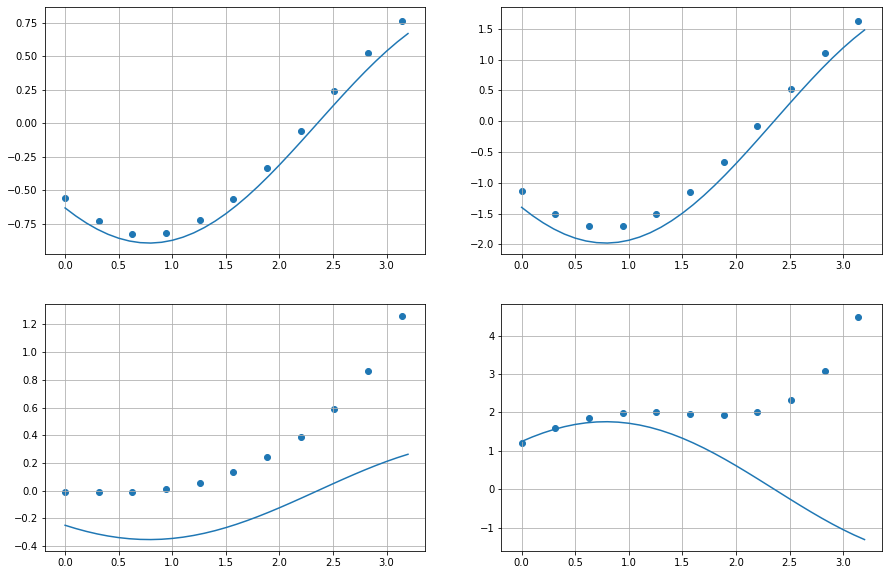

In [29]:
x, t, u = implicit(5, 10, 100, 1, 1)
Graphic.draw_levels(x, t, u, U, 0, pi)

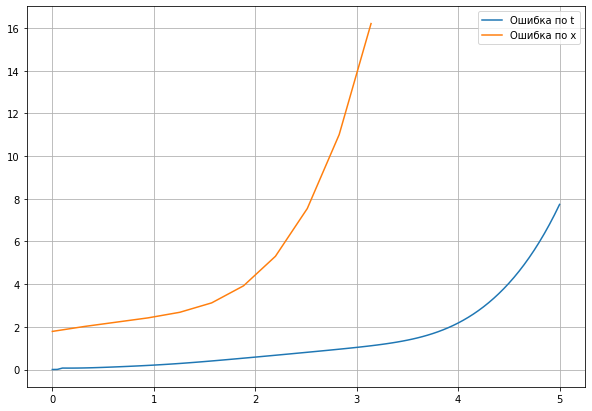

In [30]:
Graphic.draw_variance(x, t, u, U)

Аппроксимация граничных первого порядка и начальных второго:

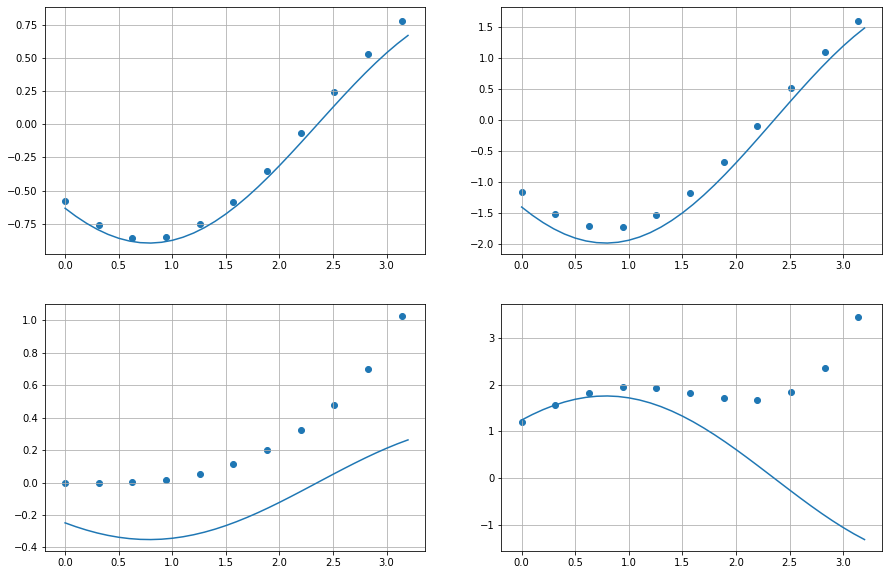

In [31]:
x, t, u = implicit(5, 10, 100, 2, 1)
Graphic.draw_levels(x, t, u, U, 0, pi)

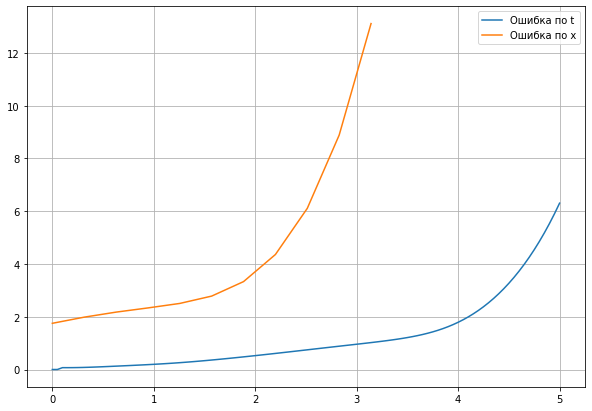

In [32]:
Graphic.draw_variance(x, t, u, U)

Трехточечная аппроксимация граничных и начальных первого порядка:

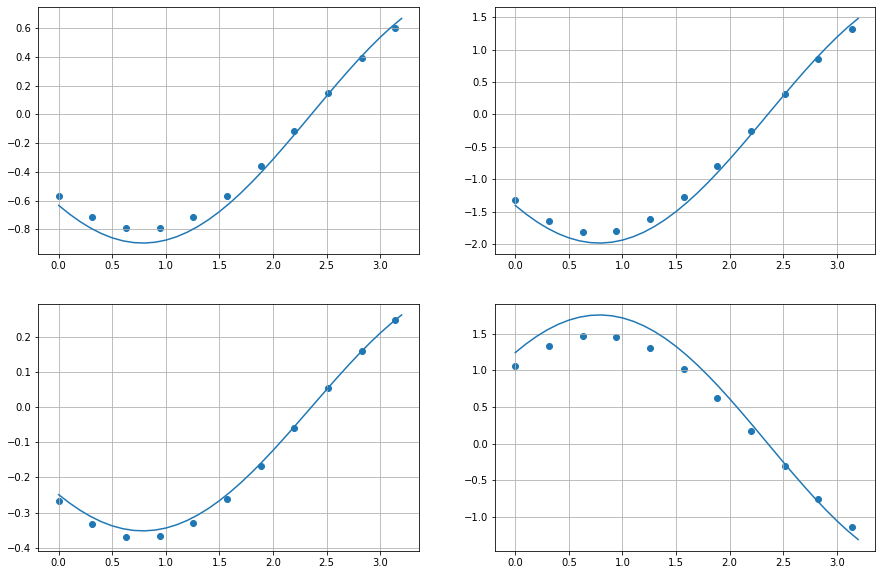

In [33]:
x, t, u = implicit(5, 10, 100, 1, 2)
Graphic.draw_levels(x, t, u, U, 0, pi)

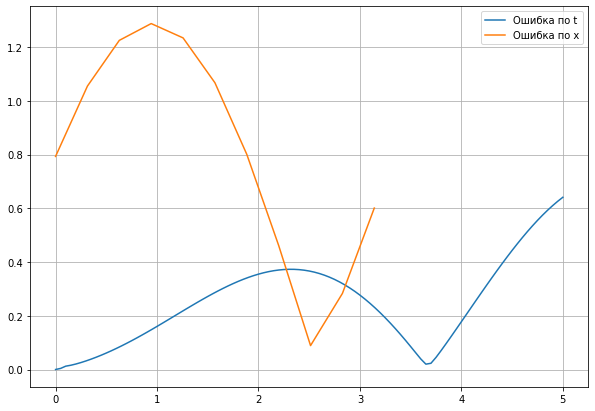

In [34]:
Graphic.draw_variance(x, t, u, U)

Трехточечная аппроксимация граничных и начальных второго порядка:

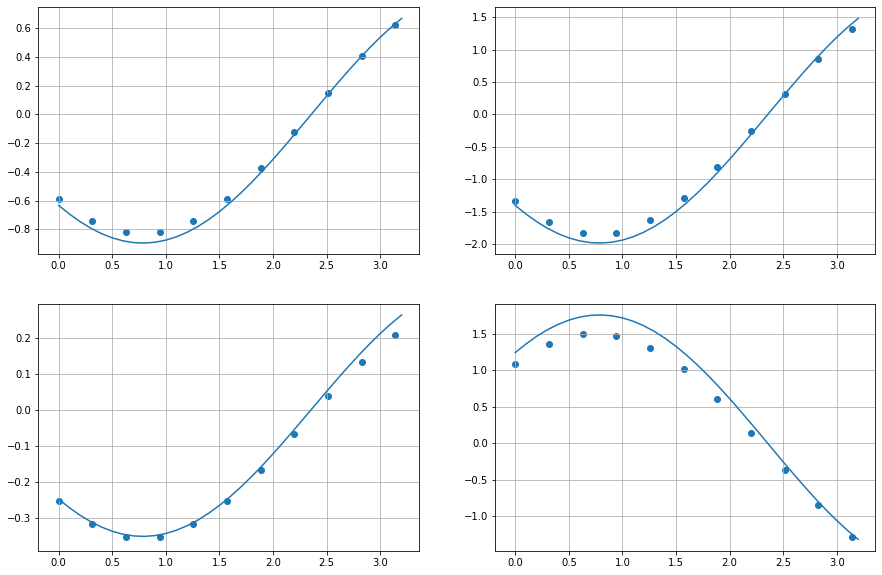

In [35]:
x, t, u = implicit(5, 10, 100, 2, 2)
Graphic.draw_levels(x, t, u, U, 0, pi)

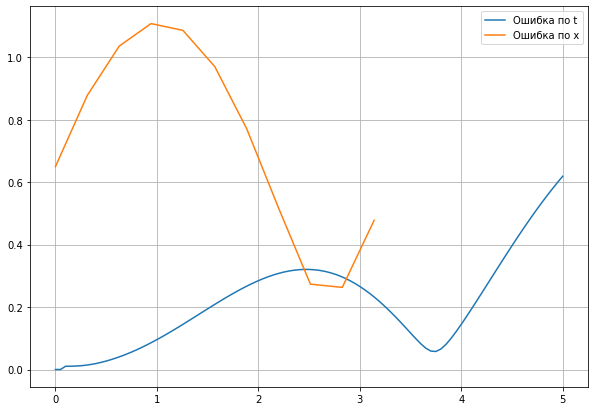

In [36]:
Graphic.draw_variance(x, t, u, U)

Двухточечная аппроксимация второго порядка граничных и начальных первого:

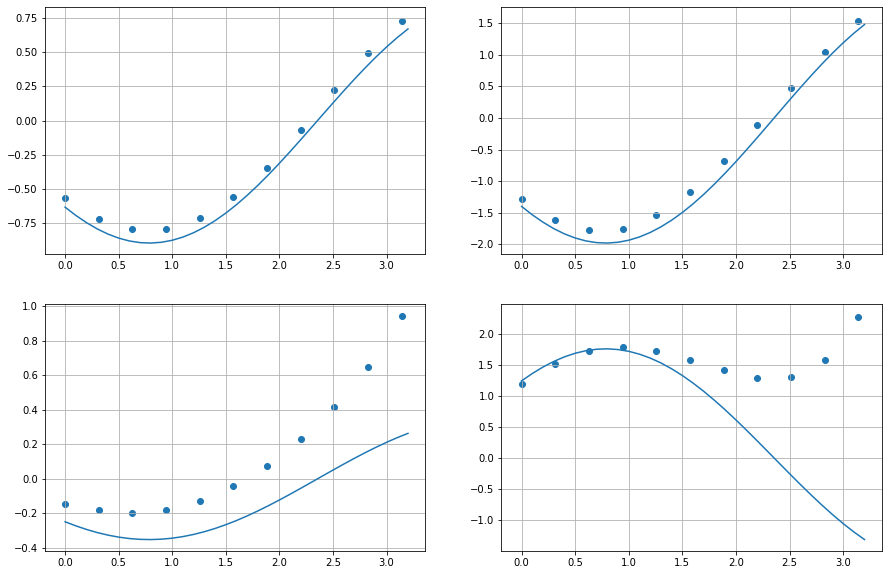

In [37]:
x, t, u = implicit(5, 10, 100, 1, 3)
Graphic.draw_levels(x, t, u, U, 0, pi)

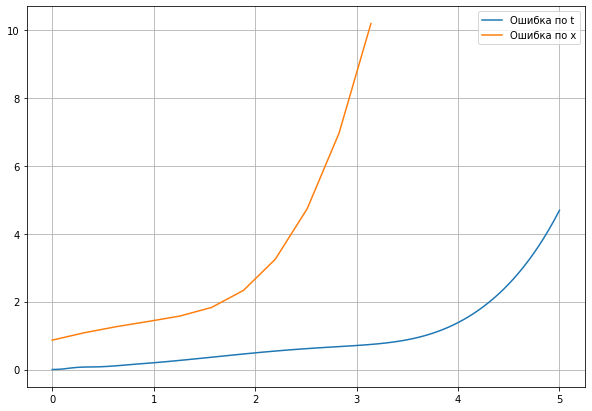

In [38]:
Graphic.draw_variance(x, t, u, U)

Двухточечная аппроксимация второго порядка граничных и начальных второго:

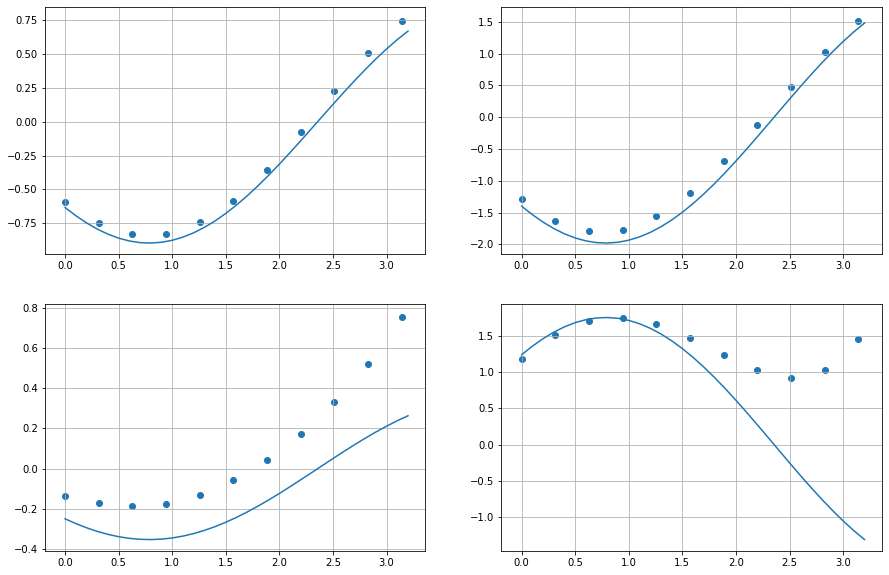

In [39]:
x, t, u = implicit(5, 10, 100, 2, 3)
Graphic.draw_levels(x, t, u, U, 0, pi)

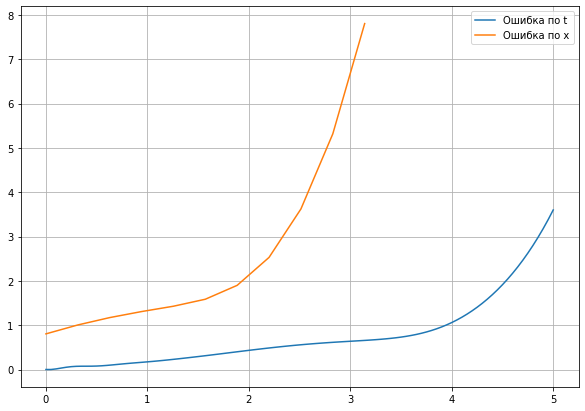

In [40]:
Graphic.draw_variance(x, t, u, U)

#### Сравнение двухточечной аппроксимации граничных первого порядка и начальных первого с двухточечной второго и начальными второго

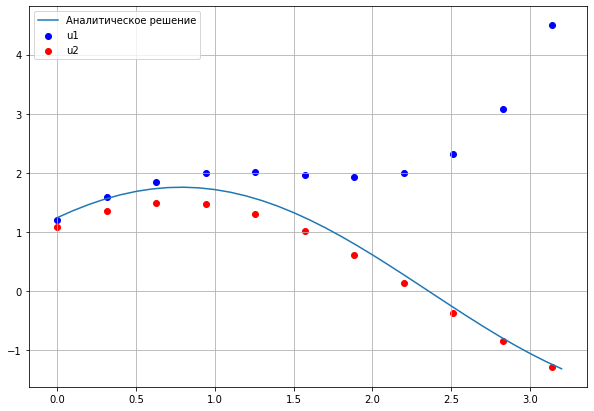

In [41]:
x, t, u_1 = implicit(5, 10, 100, 1, 1)
x, t, u_2 = implicit(5, 10, 100, 2, 2)

Graphic.draw_for_compare(x, t, u_1, u_2, U, 0, pi, 100)